# Lab 1
Welcome. The first lab is based on a dataset available from Lister Hill National Center for Biomedical Communications (NIH) from the link: https://lhncbc.nlm.nih.gov/publication/pub9932 . The data was preprocessed and organized for easier machine learning applications. It contains various sized images of cells that do or do not contain malaria.

# Hello Tommy!

So here it is, Lab 1, I though I would just do the entire lab and we could take out some parts that could be made into exercises. Listing my thoughts on what could be taken out, I'll also highlight the solution in the code.

- Solve the issue of different sized images. Currently everything is resized to 50x50.
- For compiling the model, only the accuracy should be set as a metric, optimizer and the loss should be figured out by the student.
- Build your own model. I have a function for building it, it should contain a super simple model that does not work very well.
- Reach an accuracy of 96%. I couldn't reach it without augmenting data, so that should be nice.
- Plot accuracies together with an image and it's heatmap from tensorboard

In [1]:
import numpy as np # Package for matrix operations, handling data
import pandas as pd # package for file reading
import os
import cv2
import matplotlib.pyplot as plt # Package for plotting
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
data_path = "data/cell-images-for-detecting-malaria/cell_images" # Path to dataset

In [2]:
# Look into dataset
parasitized_data = os.listdir(data_path + '/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files
print("Number of images: " + str(len(parasitized_data)))

uninfected_data = os.listdir(data_path + '/Uninfected/')
print('\n')
print(uninfected_data[:10])
print("Number of images: " + str(len(uninfected_data)))

FileNotFoundError: [Errno 2] No such file or directory: 'data/cell-images-for-detecting-malaria/cell_images/Parasitized/'

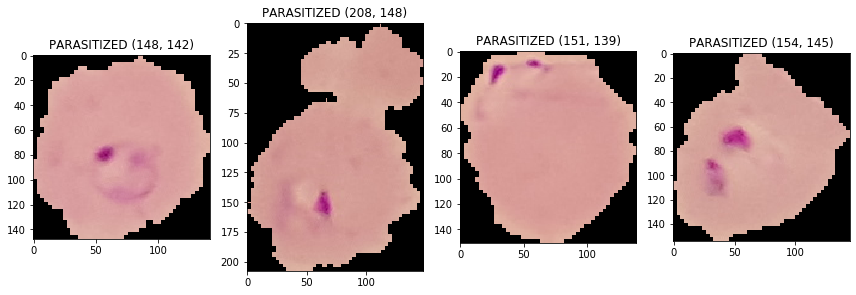

In [3]:
# Look at some sample images
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(data_path + '/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED ' + str(np.shape(img)[0:2]))
    plt.tight_layout()
plt.show()

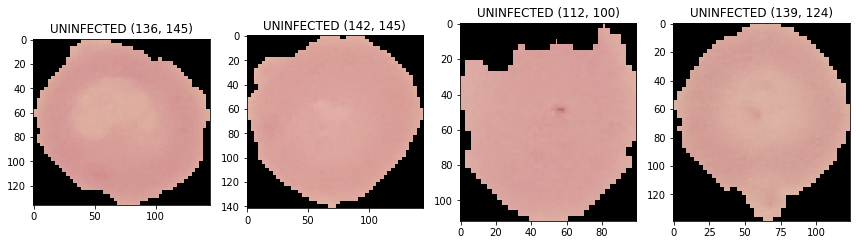

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(data_path + '/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED ' + str(np.shape(img)[0:2]))
    plt.tight_layout()
plt.show()

In [5]:
# Images are different, *one* solution is to resize everyting. 
# One could try cropping as well. Or resize to a different size.
# Labels are also created.

height = 50
width = 50
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread(data_path + '/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(data_path + '/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

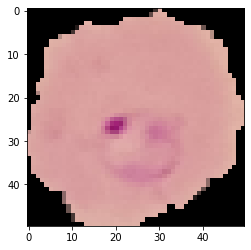

In [6]:
plt.imshow(data[0])
plt.show()

In [7]:
image_data = np.array(data)
labels = np.array(labels)

In [8]:
# Shuffle data
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

# Sizes of datasets
print(np.shape(image_data))
print(np.shape(labels))

(27558, 50, 50, 3)
(27558,)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [10]:
x_test, x_val = x_test[0:int(len(x_test)/2), :], x_test[int(len(x_test)/2):, :]
y_test, y_val = y_test[0:int(len(y_test)/2)], y_test[int(len(y_test)/2):]

In [11]:
# Two samples for the callback function
x_call, y_call = x_test[[np.argmin(y_test), np.argmax(y_test)]], y_test[[np.argmin(y_test), np.argmax(y_test)]]

In [12]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [13]:
print('Training image size: ' + str(x_train.shape))
print('Testing image size: ' + str(x_test.shape))
print('Validating image size: ' + str(x_val.shape))
print('Training label size: ' + str(y_train.shape))
print('Testing label size: ' + str(y_test.shape))
print('Validating label size: ' + str(y_val.shape))

Training image size: (22046, 50, 50, 3)
Testing image size: (2756, 50, 50, 3)
Validating image size: (2756, 50, 50, 3)
Training label size: (22046, 2)
Testing label size: (2756, 2)
Validating label size: (2756, 2)


In [14]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [15]:
def build_model(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), input_shape = inputShape))
    model.add(Activation('relu', name='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [16]:
#instantiate the model
# Height and width were defined when resizing.
classes = 2
channels = 3
model = build_model(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
relu (Activation)            (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0

In [17]:
#compile the model, try out different optimizers
optim = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [18]:
from tf_explain.callbacks.grad_cam import GradCAMCallback

output_dir = 'callback'
callbacks = [
    GradCAMCallback(
        validation_data=(x_call, y_call),
        layer_name="relu",
        class_index=0,
        output_dir = output_dir
    )
]

In [19]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 64, callbacks=callbacks, validation_data=(x_val, y_val))

Train on 22046 samples, validate on 2756 samples
Epoch 1/20
22046/22046 [==============================] - 28s 1ms/sample - loss: 0.5875 - accuracy: 0.7511 - val_loss: 4.7500 - val_accuracy: 0.4985
Epoch 2/20
22046/22046 [==============================] - 24s 1ms/sample - loss: 0.2351 - accuracy: 0.9101 - val_loss: 0.5590 - val_accuracy: 0.8255
Epoch 3/20
22046/22046 [==============================] - 26s 1ms/sample - loss: 0.1790 - accuracy: 0.9379 - val_loss: 0.2362 - val_accuracy: 0.9271
Epoch 4/20
22046/22046 [==============================] - 25s 1ms/sample - loss: 0.1698 - accuracy: 0.9409 - val_loss: 0.1948 - val_accuracy: 0.9427
Epoch 5/20
22046/22046 [==============================] - 31s 1ms/sample - loss: 0.1550 - accuracy: 0.9468 - val_loss: 0.1893 - val_accuracy: 0.9448
Epoch 6/20
22046/22046 [==============================] - 26s 1ms/sample - loss: 0.1475 - accuracy: 0.9494 - val_loss: 0.2073 - val_accuracy: 0.9416
Epoch 7/20
22046/22046 [==============================] -

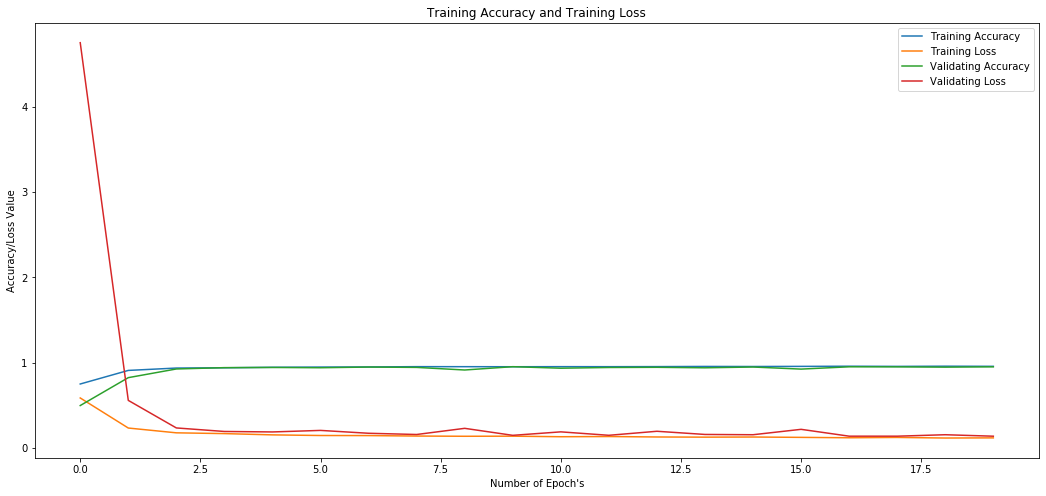

In [20]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Training Loss')
plt.plot(range(20), h.history['val_accuracy'], label = 'Validating Accuracy')
plt.plot(range(20), h.history['val_loss'], label = 'Validating Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [21]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test, verbose=0)

In [35]:
print('Test loss: ' + str(predictions[0]))
print('Test accuracy: ' + str(predictions[1]))

Test loss: 0.11803170082704076
Test accuracy: 0.9560958


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   zoom_range = 0.3,
                                   rotation_range = 30)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)

In [25]:
#calling the same model as above
model_aug = build_model(height = height, width = width, classes = classes, channels = channels)

In [26]:
#compile the model
optim = optimizers.Adam()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [27]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50, callbacks=callbacks, validation_data=(x_val, y_val))

W0113 11:32:47.950925  6476 deprecation.py:323] From c:\users\attil\anaconda3\envs\mice_gpu\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
344/344 [==============================] - 41s 119ms/step - loss: 0.6935 - accuracy: 0.6962 - val_loss: 1.5310 - val_accuracy: 0.4996
Epoch 2/50
344/344 [==============================] - 44s 127ms/step - loss: 0.3349 - accuracy: 0.8653 - val_loss: 0.4173 - val_accuracy: 0.8451
Epoch 3/50
344/344 [==============================] - 47s 136ms/step - loss: 0.2671 - accuracy: 0.9004 - val_loss: 0.2010 - val_accuracy: 0.9289
Epoch 4/50
344/344 [==============================] - 43s 125ms/step - loss: 0.2342 - accuracy: 0.9156 - val_loss: 0.1740 - val_accuracy: 0.9394
Epoch 5/50
344/344 [==============================] - 40s 117ms/step - loss: 0.2326 - accuracy: 0.9184 - val_loss: 0.1601 - val_accuracy: 0.9463
Epoch 6/50
344/344 [==============================] - 39s 113ms/step - loss: 0.2171 - accuracy: 0.9241 - val_loss: 0.2516 - val_accuracy: 0.9470
Epoch 7/50
344/344 [==============================] - 36s 105ms/step - loss: 0.2129 - accuracy: 0.9258 - val_loss: 0.1683 - val_ac

Text(0.5, 1.0, 'Training Accuracy and Training Loss')

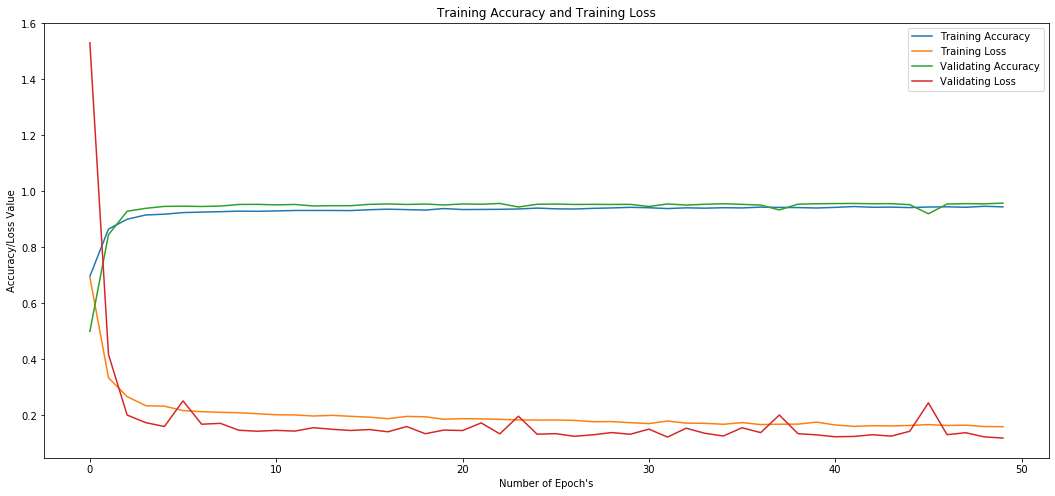

In [28]:
plt.figure(figsize = (18,8))
plt.plot(range(50), h_aug.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(50), h_aug.history['loss'], label = 'Training Loss')
plt.plot(range(50), h_aug.history['val_accuracy'], label = 'Validating Accuracy')
plt.plot(range(50), h_aug.history['val_loss'], label = 'Validating Loss')
plt.legend(loc = "best")
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')

In [32]:
#evaluate the model on augmented test data
predict = model_aug.evaluate(x_test, y_test, verbose=0)

In [34]:
print('Test loss: ' + str(predict[0]))
print('Test accuracy: ' + str(predict[1]))

Test loss: 0.10475536509645435
Test accuracy: 0.96298987
